#SARIMAX MODEL


Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models. Intuitively, ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA).

Here We have applied Sarimax model with monthly seasonality on Nizamabad District univariate AQI data provided by NASSCOM.


In [158]:
## Included all necessary Header files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [159]:
#Preprocessing the data

df = pd.read_excel("AQI1.xlsx")

df.index = pd.to_datetime(df["Month"])
df.drop(columns="Month",inplace=True)

df['Nizamabad'] = pd.to_numeric(df['Nizamabad'],errors='coerce')

# EDA

In [160]:
print(df.dtypes)
print(df.isna().sum())

Nizamabad             float64
Adilabad               object
Kuda, warangal          int64
Mee-Seva, Warangal      int64
Khammam                object
Karimnagar              int64
dtype: object
Nizamabad             1
Adilabad              0
Kuda, warangal        0
Mee-Seva, Warangal    0
Khammam               0
Karimnagar            0
dtype: int64


<AxesSubplot:xlabel='Month'>

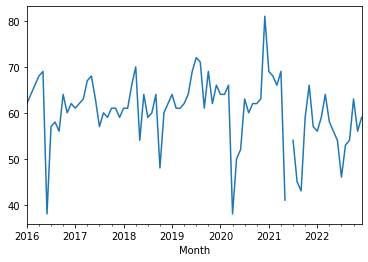

In [161]:
df["Nizamabad"].plot()

In [162]:
df['Nizamabad'] = df['Nizamabad'].interpolate(method="time")

<AxesSubplot:xlabel='Month'>

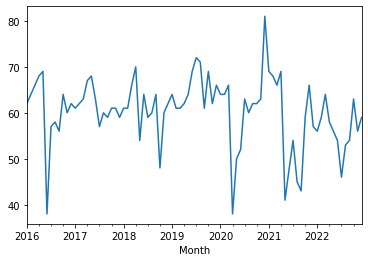

In [163]:
df["Nizamabad"].plot()

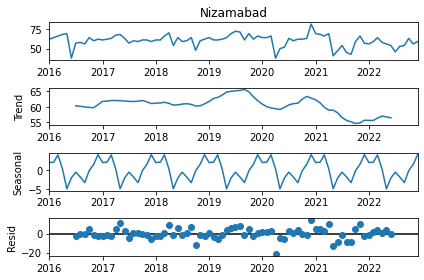

In [164]:
decompose_data = seasonal_decompose(df["Nizamabad"], model="additive")
decompose_data.plot();

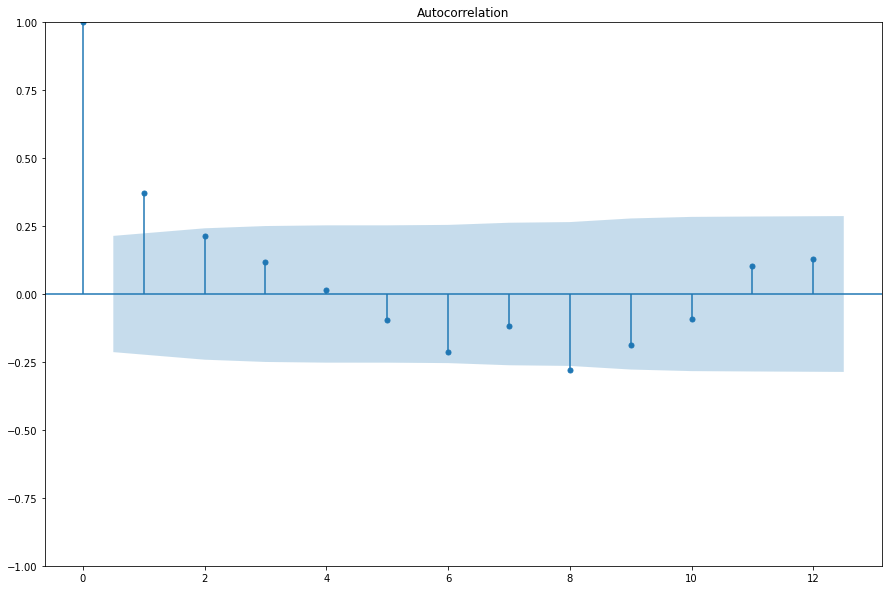

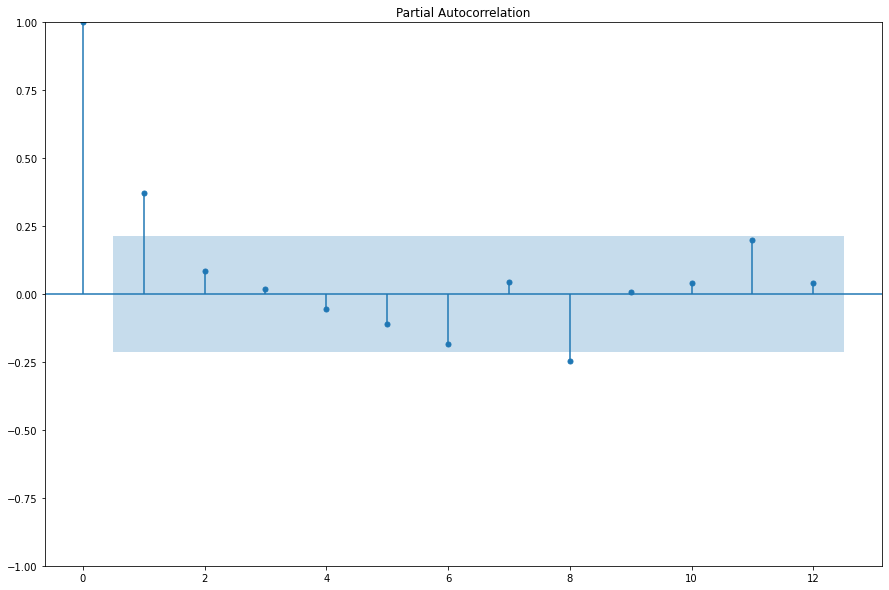

In [165]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
f_acf = plot_acf(df['Nizamabad'], lags=12)
f_pacf = plot_pacf(df['Nizamabad'], lags=12, method='ols')
f_acf.set_figheight(10)
f_acf.set_figwidth(15)
f_pacf.set_figheight(10)
f_pacf.set_figwidth(15)
plt.show()

# MODEL

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-166-f4ce51cde229>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['forecast']=results.predict(start=71,end=83,dynamic=True)


            Nizamabad   forecast
Month                           
2022-01-01       56.0  63.089214
2022-02-01       59.0  62.544274
2022-03-01       64.0  63.429499
2022-04-01       58.0  61.731917
2022-05-01       56.0  54.551305
2022-06-01       54.0  53.002233
2022-07-01       46.0  58.138488
2022-08-01       53.0  55.988104
2022-09-01       54.0  54.423498
2022-10-01       63.0  58.941465
2022-11-01       56.0  60.951146
2022-12-01       59.0  64.886989


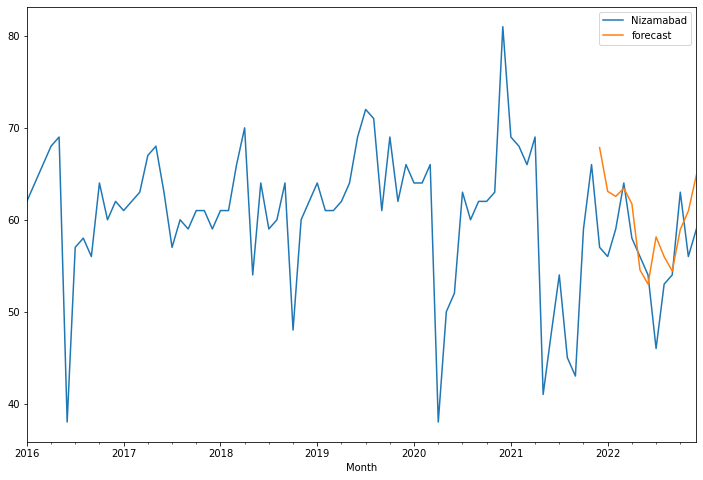

In [166]:
data = df[["Nizamabad"]]
model=sm.tsa.statespace.SARIMAX(df["Nizamabad"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data['forecast']=results.predict(start=71,end=83,dynamic=True)
data[['Nizamabad','forecast']].plot(figsize=(12,8))
print(data.tail(12))

<AxesSubplot:>

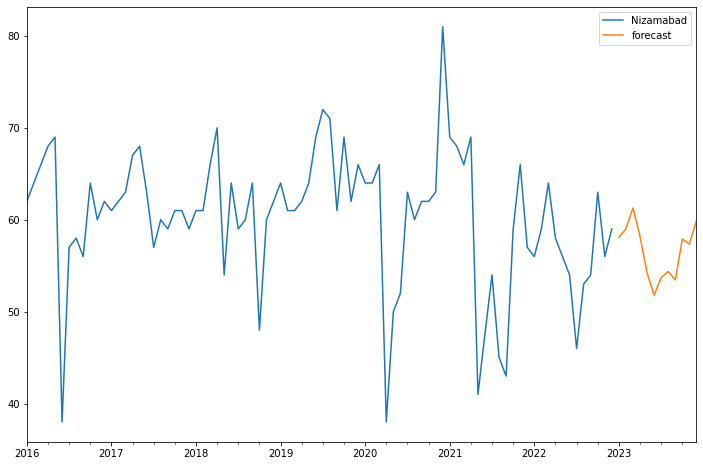

In [167]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(1,13)]
pred_date=pd.DataFrame(index=pred_date,columns=data.columns)
df5 = pd.concat([data,pred_date])
df5['forecast'] = results.predict(start = 84, end = 95, dynamic= True)  
df5[['Nizamabad', 'forecast']].plot(figsize=(12, 8))

# ERROR CALCULATION

In [168]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse = round(sqrt(mean_squared_error(df["Nizamabad"].iloc[-12:], data["forecast"].iloc[-12:])),2)
mae = round(mean_absolute_error(df["Nizamabad"].iloc[-12:], data["forecast"].iloc[-12:]),2)
mape = mean_absolute_percentage_error(df["Nizamabad"].iloc[-12:], data["forecast"].iloc[-12:])
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"MAPE : {mape*100}%")

RMSE : 5.1
MAE  : 3.99
MAPE : 7.374881513079219%


The mean absolute percentage error is : 7.37%
Hence our accuracy is : 92.63% which is acceptable

In [169]:
df5["Nizamabad"][-12:]=df5["forecast"][-12:]
df_final = df5[["Nizamabad"]]

In [170]:
df_final.to_csv("Nizamabad_AQI_S.csv")